# Hackathon Tripleten: Data Analysis

In [1]:
# importamos librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import datetime

## Tratamiento de datos

In [2]:
# cargamos datos
df = pd.read_csv('df_online_retail_cleaned.csv')
df.head(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,normalized_description
0,536365,85123A,WHITE HANGING HEART TLIGHT HOLDER,6,2019-01-12 08:26:00,2.55,17850.0,United Kingdom,white hang heart tlight holder
1,536365,71053,WHITE METAL LANTERN,6,2019-01-12 08:26:00,3.39,17850.0,United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-01-12 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-01-12 08:26:00,3.39,17850.0,United Kingdom,knit union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2019-01-12 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart


In [3]:
# mostramos info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535187 entries, 0 to 535186
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   invoice_no              535187 non-null  object 
 1   stock_code              535187 non-null  object 
 2   description             535187 non-null  object 
 3   quantity                535187 non-null  int64  
 4   invoice_date            535187 non-null  object 
 5   unit_price              535187 non-null  float64
 6   customer_id             535187 non-null  object 
 7   region                  535187 non-null  object 
 8   normalized_description  535187 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 36.7+ MB


In [6]:
# cambiamos tipos de dato
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['quantity'] = df['quantity'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535187 entries, 0 to 535186
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   invoice_no              535187 non-null  object        
 1   stock_code              535187 non-null  object        
 2   description             535187 non-null  object        
 3   quantity                535187 non-null  int64         
 4   invoice_date            535187 non-null  datetime64[ns]
 5   unit_price              535187 non-null  float64       
 6   customer_id             535187 non-null  object        
 7   region                  535187 non-null  object        
 8   normalized_description  535187 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 36.7+ MB


In [7]:
# mostramos describe
df.describe()

,quantity,invoice_date,unit_price
count,535187.000000,535187,535187.000000
mean,9.671593,2020-06-15 18:13:42.470650368,4.645242
min,-80995.000000,2019-01-12 08:26:00,-11062.060000
25%,1.000000,2020-03-23 10:43:00,1.250000
50%,3.000000,2020-07-03 14:54:00,2.080000
75%,10.000000,2020-10-04 15:32:00,4.130000
max,80995.000000,2020-12-10 17:19:00,38970.000000
std,219.059056,NaN,97.364810


In [8]:
# trabajaremos con la df de qtity > 0 y unit price > 0
df_pos = df[(df['quantity'] > 0) & 
                     (df['unit_price'] > 0)]
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 535186
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   invoice_no              524878 non-null  object        
 1   stock_code              524878 non-null  object        
 2   description             524878 non-null  object        
 3   quantity                524878 non-null  int64         
 4   invoice_date            524878 non-null  datetime64[ns]
 5   unit_price              524878 non-null  float64       
 6   customer_id             524878 non-null  object        
 7   region                  524878 non-null  object        
 8   normalized_description  524878 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 40.0+ MB


In [9]:
# mostramos describe para df positivo
df_pos.describe()

,quantity,invoice_date,unit_price
count,524878.000000,524878,524878.000000
mean,10.616600,2020-06-15 19:21:51.678637568,3.922573
min,1.000000,2019-01-12 08:26:00,0.001000
25%,1.000000,2020-03-23 10:43:00,1.250000
50%,4.000000,2020-07-03 17:22:00,2.080000
75%,11.000000,2020-10-05 10:20:00,4.130000
max,80995.000000,2020-12-10 17:19:00,13541.330000
std,156.280031,NaN,36.093028


In [10]:
# calculamos percentil para quantity
pos_percentile_qtity = 99
pos_thres_qtity = np.percentile(df_pos['quantity'],
                                 q=pos_percentile_qtity)
pos_thres_qtity

np.float64(100.0)

In [11]:
# calculamos percentil 99 para unit price
pos_percentile_uprice = 99
pos_thres_uprice = np.percentile(df_pos['unit_price'],
                                  q=pos_percentile_uprice)
pos_thres_uprice

np.float64(16.98)

In [12]:
# filtramos datos atipicos
df_pos_typical = df_pos[
    (df_pos['quantity'] < pos_thres_qtity) & 
    (df_pos['unit_price'] < pos_thres_uprice)]
df_pos_typical.describe()

,quantity,invoice_date,unit_price
count,512897.000000,512897,512897.000000
mean,7.730147,2020-06-16 01:32:06.094673920,3.119126
min,1.000000,2019-01-12 08:26:00,0.001000
25%,1.000000,2020-03-23 12:05:00,1.250000
50%,3.000000,2020-07-04 10:10:00,2.080000
75%,10.000000,2020-10-05 12:20:00,4.130000
max,99.000000,2020-12-10 17:19:00,16.950000
std,11.427878,NaN,2.941307


In [15]:
# mostramos info una vez mas
df_pos_typical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512897 entries, 0 to 535186
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   invoice_no              512897 non-null  object        
 1   stock_code              512897 non-null  object        
 2   description             512897 non-null  object        
 3   quantity                512897 non-null  int64         
 4   invoice_date            512897 non-null  datetime64[ns]
 5   unit_price              512897 non-null  float64       
 6   customer_id             384288 non-null  float64       
 7   region                  512897 non-null  object        
 8   normalized_description  512897 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 39.1+ MB


##  Top de productos

In [49]:
# mostramos el top 10 de productos mas vendidos
top10_products_quantity = df_pos_typical.groupby(by='normalized_description').agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False).head(10).reset_index()
top10_products_quantity

,normalized_description,quantity
0,white hang heart tlight holder,29841
1,wooden heart christmas scandinavian,23163
2,assort colour bird ornament,22682
3,world war 2 gliders asstd design,21927
4,pack of 72 retrospot cake case,19029
5,victorian glass hang tlight,18945
6,red stripe ceramic drawer knob,18648
7,jumbo bag red retrospot,17540
8,roses regency teacup and saucer,15036
9,rabbit night light,15016


C:\Users\ayrto\AppData\Local\Temp\ipykernel_22376\601242180.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  top10_products_quantity_barplot.set_xticklabels(labels=top10_products_quantity['normalized_description'], rotation= 90, size=7)


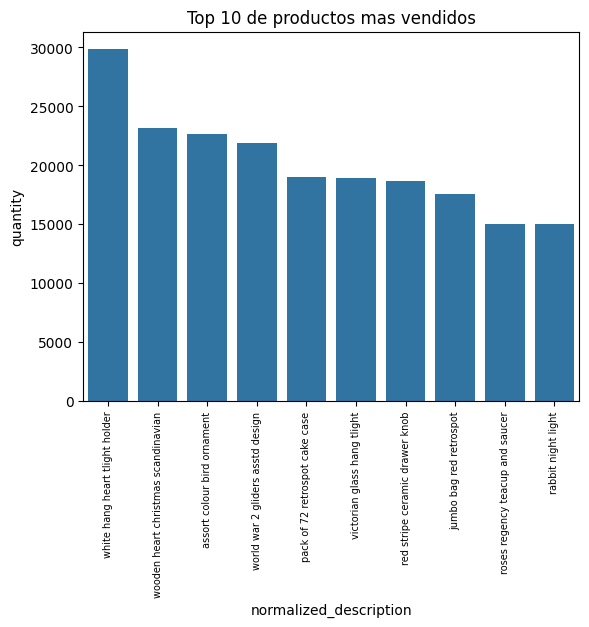

In [57]:
# grafico de barras
top10_products_quantity_barplot = sns.barplot(data=top10_products_quantity, x='normalized_description', y='quantity')
top10_products_quantity_barplot.set_xticklabels(labels=top10_products_quantity['normalized_description'], rotation= 90, size=7)

plt.title('Top 10 de productos mas vendidos')
plt.show()

In [59]:
# creamos la columna total
df_pos_typical.loc[:,'total'] = df_pos_typical['quantity'] * df_pos_typical['unit_price']

In [61]:
# mostramos el top 10 de productos que recaudan mas
top10_products_total = df_pos_typical.groupby(by='normalized_description').agg({'total': 'sum'}).sort_values(by='total', ascending=False).head(10).reset_index()
top10_products_total

,normalized_description,total
0,regency cakestand 3 tier,127590.47
1,white hang heart tlight holder,84791.87
2,party bunt,80760.95
3,alarm clock bakelike red,54773.30
4,roses regency teacup and saucer,46442.12
5,paper chain kit 50s christmas,44460.21
6,chilli light,43979.80
7,jumbo bag red retrospot,39569.56
8,assort colour bird ornament,38978.34
9,spotty bunt,37135.08


C:\Users\ayrto\AppData\Local\Temp\ipykernel_22376\3685340678.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  top10_products_total_barplot.set_xticklabels(labels=top10_products_total['normalized_description'], rotation= 90, size=7)


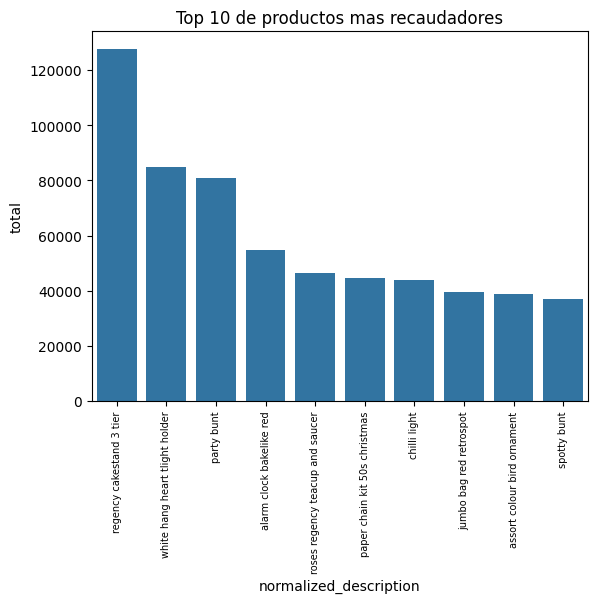

In [63]:
# grafico de barras
top10_products_total_barplot = sns.barplot(data=top10_products_total, x='normalized_description', y='total')
top10_products_total_barplot.set_xticklabels(labels=top10_products_total['normalized_description'], rotation= 90, size=7)

plt.title('Top 10 de productos mas recaudadores')
plt.show()